In [5]:
library(tidyverse)
library(arcadiathemeR)
library(UpSetR)
library(clusterProfiler)

In [2]:
setwd("..")

In [7]:
viruses <- read_tsv("outputs/viruses/foldseek_with_uniprot_metadata/20241018_nomburg_human_viruses_with_uniprot_metadata_filtered.tsv", show_col_types = FALSE)
eukaryotes <- read_tsv("outputs/structural_comparison/foldseek_with_uniprot_metadata/20241018_combined_with_uniprot_metadata_filtered.tsv.gz", show_col_types = FALSE)

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details, e.g.:
  dat <- vroom(...)
  problems(dat)”


## How many negative controls are present after filtering?

In [15]:
ctrl_organisms <- c("Acrobeloides nanus", "Bodo saltans (Flagellated protozoan)", "Macrostomum lignano")

In [16]:
eukaryotes %>%
  group_by(query_organism) %>%
  tally() %>%
  filter(query_organism %in% ctrl_organisms)

query_organism                       n   
1 Bodo saltans (Flagellated protozoan)  513
2 Macrostomum lignano                  2553

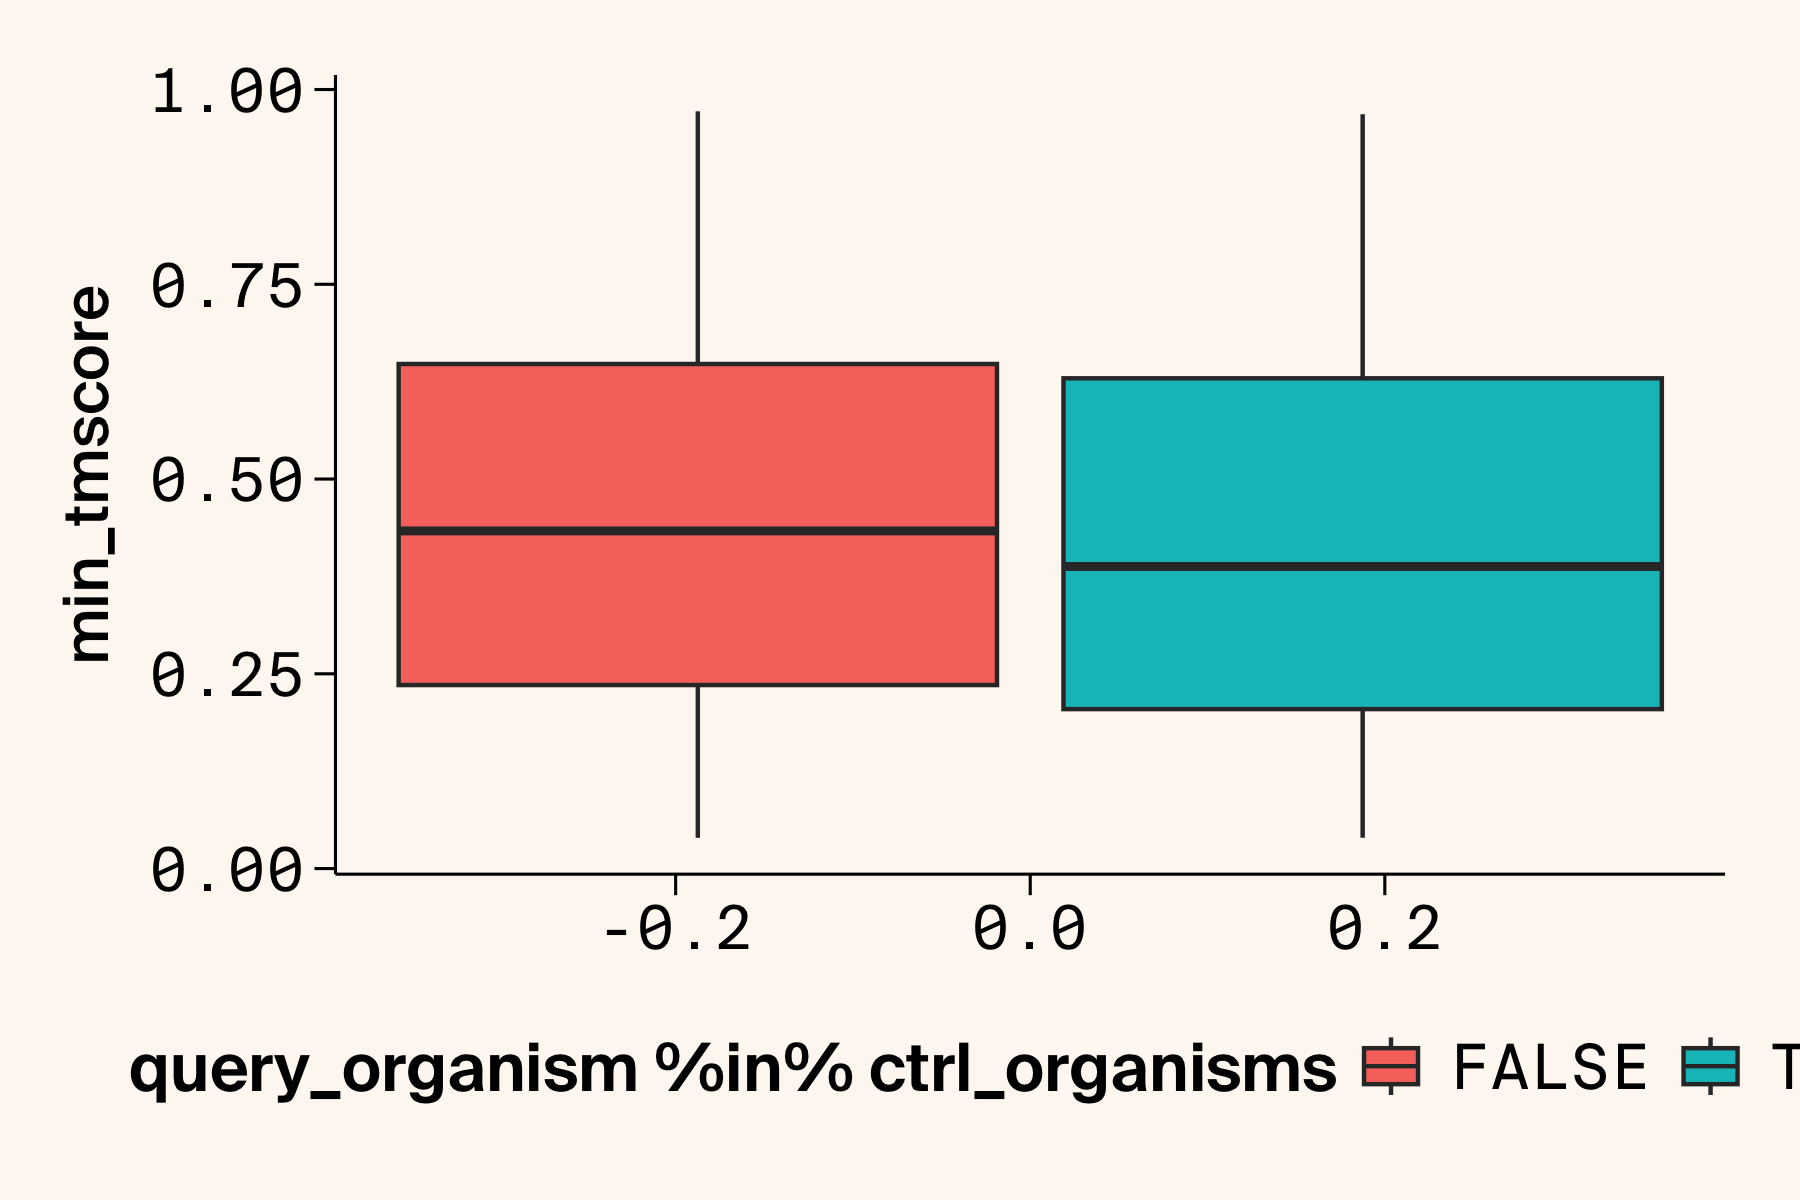

In [36]:
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 300)
ggplot(eukaryotes, aes(y = min_tmscore, fill = query_organism %in% ctrl_organisms)) +
  geom_boxplot() +
  theme_arcadia() +
  theme(legend.position = "bottom")

In [46]:
neg_ctrl_matches <- eukaryotes %>%
  filter(query_organism %in% ctrl_organisms)

neg_ctrl_matches %>% select(query_organism, target) %>% distinct() %>% group_by(query_organism) %>% tally()

eukaryote_matches <- eukaryotes %>%
  filter(!query_organism %in% ctrl_organisms)

query_organism                       n  
1 Bodo saltans (Flagellated protozoan) 320
2 Macrostomum lignano                  891

In [47]:
table(neg_ctrl_matches$target %in% eukaryote_matches$target)
table(unique(neg_ctrl_matches$target) %in% unique(eukaryote_matches$target))


FALSE  TRUE 
  820  2246 


FALSE  TRUE 
  413   714 

In [48]:
table(viruses$target %in% eukaryote_matches$target)
table(unique(viruses$target) %in% unique(eukaryote_matches$target))


FALSE  TRUE 
  331   106 


FALSE  TRUE 
  129    49 

In [49]:
table(viruses$target %in% neg_ctrl_matches$target)
table(unique(viruses$target) %in% unique(neg_ctrl_matches$target))


FALSE  TRUE 
  400    37 


FALSE  TRUE 
  163    15 

## Do parasites and viruses mimic the same human targets?

In [76]:
length(unique(viruses$target))
length(unique(eukaryote_matches$target))

[1] 178

[1] 3091

In [77]:
table(unique(viruses$target) %in% unique(eukaryote_matches$target))
table(viruses$target %in% eukaryote_matches$target)


FALSE  TRUE 
  129    49 


FALSE  TRUE 
  331   106 

In [78]:
table(unique(eukaryote_matches$target) %in% unique(viruses$target))
table(eukaryote_matches$target %in% viruses$target)


FALSE  TRUE 
 3042    49 


FALSE  TRUE 
 9366   184 

In [54]:
eukaryote_matches %>% 
  filter(target %in% viruses$target) %>% 
  group_by(target, human_gene_names_primary, human_function_cc) %>%
  tally() %>% 
  arrange(desc(n))

target human_gene_names_primary
1  Q8WZ42 TTN                     
2  P00441 SOD1                    
3  P35237 SERPINB6                
4  Q6ZS10 CLEC17A                 
5  O75715 GPX5                    
6  P30740 SERPINB1                
7  Q14004 CDK13                   
8  Q5VT06 CEP350                  
9  Q9HCK4 ROBO2                   
10 P01011 SERPINA3                
11 Q8N1Q1 CA13                    
12 Q9NY25 CLEC5A                  
13 O94889 KLHL18                  
14 Q12955 ANK3                    
15 Q8IV08 PLD3                    
16 Q96D42 HAVCR1                  
17 O43196 MSH5                    
18 P50583 NUDT2                   
19 Q14CZ8 HEPACAM                 
20 Q5T0T0 MARCHF8                 
21 O15067 PFAS                    
22 O75179 ANKRD17                 
23 O95998 IL18BP                  
24 P04183 TK1                     
25 P05160 F13B                    
26 P05198 EIF2S1                  
27 P05452 CLEC3B                  
28 P07451 CA3                     
29 P12036 NEFH                    
30 P15692 VEGFA                   
31 P33316 DUT                     
32 P49916 LIG3                    
33 P50052 AGTR2                   
34 P78324 SIRPA                   
35 P78380 OLR1                    
36 Q00535 CDK5                    
37 Q07108 CD69                    
38 Q495A1 TIGIT                   
39 Q6UXG3 CD300LG                 
40 Q6UXG8 BTNL9                   
41 Q6W5P4 NPSR1                   
42 Q7Z6A9 BTLA                    
43 Q8WVV5 BTN2A2                  
44 Q92545 TMEM131                 
45 Q9BXP8 PAPPA2                  
46 Q9H2U1 DHX36                   
47 Q9NQ25 SLAMF7                  
48 Q9NR64 KLHL1                   
49 Q9UIB8 CD84                    
   human_function_cc                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [52]:
eukaryote_matches %>% group_by(target, human_gene_names_primary, human_function_cc) %>% tally() %>% arrange(desc(n))

target human_gene_names_primary
1    Q9H0B8 CRISPLD2                
2    P61916 NPC2                    
3    P07858 CTSB                    
4    O43897 TLL1                    
5    Q6UXB8 PI16                    
6    P20142 PGC                     
7    Q96KR4 LMLN                    
8    Q16820 MEP1B                   
9    P11117 ACP2                    
10   P06276 BCHE                    
11   Q9H3Y0 R3HDML                  
12   Q6UWM5 GLIPR1L1                
13   Q8WZ42 TTN                     
14   P10619 CTSA                    
15   P0DP58 LYNX1                   
16   P14091 CTSE                    
17   Q9UBX1 CTSF                    
18   P21754 ZP3                     
19   P07237 P4HB                    
20   P10646 TFPI                    
21   P00441 SOD1                    
22   P48307 TFPI2                   
23   Q5VUB5 FAM171A1                
24   Q6UXF7 CLEC18B                 
25   Q14210 LY6D                    
26   P07339 CTSD                    
27   P13497 BMP1                    
28   P16066 NPR1                    
29   P35625 TIMP3                   
30   P48052 CPA2                    
⋮    ⋮      ⋮                       
3062 Q9Y4P3 TBL2                    
3063 Q9Y547 IFT25                   
3064 Q9Y548 YIPF1                   
3065 Q9Y5B0 CTDP1                   
3066 Q9Y5F6 PCDHGC5                 
3067 Q9Y5G5 PCDHGA8                 
3068 Q9Y5I0 PCDHA13                 
3069 Q9Y5K3 PCYT1B                  
3070 Q9Y5P4 CERT1                   
3071 Q9Y5R4 HEMK1                   
3072 Q9Y5R8 TRAPPC1                 
3073 Q9Y5T4 DNAJC15                 
3074 Q9Y5W5 WIF1                    
3075 Q9Y5Z4 HEBP2                   
3076 Q9Y663 HS3ST3A1                
3077 Q9Y672 ALG6                    
3078 Q9Y673 ALG5                    
3079 Q9Y694 SLC22A7                 
3080 Q9Y6C5 PTCH2                   
3081 Q9Y6F6 IRAG1                   
3082 Q9Y6F9 WNT6                    
3083 Q9Y6I9 TEX264                  
3084 Q9Y6M5 SLC30A1                 
3085 Q9Y6N5 SQOR                    
3086 Q9Y6P5 SESN1                   
3087 Q9Y6R4 MAP3K4                  
3088 Q9Y6U3 SCIN                    
3089 Q9Y6V7 DDX49                   
3090 Q9Y6Y1 CAMTA1                  
3091 Q9Y6Z7 COLEC10                 
     human_function_cc                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

## Do parasites that cause dermatoses target proteins that overlap with dermatopharmacologic immunomodulators?

In [63]:
drug_targets <- read_csv("~/Downloads/IMMUNOMODULATORY-AGENTS-review-of-dermatology-section-2.4 - Sheet1.csv", show_col_types = FALSE)

In [65]:
drug_targets <- drug_targets %>%
  select(uniprot_id_of_target) %>%
  separate(uniprot_id_of_target, into = c("t1", "t2", "t3", "t4", "t5", "t6"), sep = "; ") %>%
  pivot_longer(cols = starts_with("t")) %>%
  filter(!is.na(value))

Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 35 rows [1, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, ...].”


In [66]:
drug_targets

name value 
1  t1   P23458
2  t1   P19793
3  t2   P48443
4  t3   P28702
5  t4   P10276
6  t5   P13631
7  t6   P10826
8  t1   P01375
9  t1   P01583
10 t1   P27815
11 t2   Q07343
12 t3   Q08499
13 t4   Q08493
14 t1   P23458
15 t2   O60674
16 t1   Q16552
17 t2   Q96PD4
18 t3   Q8TAD2
19 t4   Q9UHF5
20 t5   Q9P0M4
21 t1   P01583
22 t1   P01375
23 t1   P27815
24 t2   Q07343
25 t3   Q08499
26 t4   Q08493
27 t1   P60568
28 t1   P05164
29 t1   P29597
30 t1   P05112
31 t2   P24394
32 t1   P01375
33 t1   P01583
34 t1   P01375
35 t1   Q9NPF7
36 t1   P01375
37 t1   Q16552
38 t1   P35225
39 t1   P00374
40 t1   Q6EBC2
41 t1   P0DOX4
42 t1   P01583
43 t1   Q9NPF7
44 t1   P0DOX5
45 t1   P27815
46 t2   Q07343
47 t3   Q08499
48 t4   Q08493
49 t1   P23458
50 t2   O60674
51 t1   Q16552
52 t1   Q9UBH0
53 t1   Q9NPF7
54 t1   P23458
55 t2   P52333
56 t1   P35225
57 t1   P23458
58 t1   P29460
59 t2   P29459
60 t3   Q9NPF7

In [67]:
table(viruses$target %in% drug_targets$value)


FALSE  TRUE 
  436     1 

In [73]:
viruses %>%
  filter(target %in% drug_targets$value) %>%
  select(query_organism, avg_tmscore, target, human_gene_names_primary)

query_organism                                                                             
1 Human herpesvirus 8 type P (isolate GK18) (HHV-8) (Kaposi's sarcoma-associated herpesvirus)
  avg_tmscore target human_gene_names_primary
1 0.9073      P00374 DHFR

In [72]:
eukaryote_matches %>%
  filter(target %in% drug_targets$value) %>%
  select(query_organism, avg_tmscore, target, human_gene_names_primary)

query_organism                                    avg_tmscore target
1 Ancylostoma ceylanicum                            0.4797000   Q8TAD2
2 Ancylostoma ceylanicum                            0.3743333   Q8TAD2
3 Toxocara canis (Canine roundworm)                 0.3987667   Q96PD4
4 Toxocara canis (Canine roundworm)                 0.5396000   Q8TAD2
5 Ixodes scapularis (Black-legged tick) (Deer tick) 0.4467000   Q9P0M4
  human_gene_names_primary
1 IL17D                   
2 IL17D                   
3 IL17F                   
4 IL17D                   
5 IL17C

## Are any GO terms enriched amoung hits?

In [89]:
library(org.Hs.eg.db)
library(AnnotationDbi)
library(enrichplot)
library(DOSE)

### Eukaryotes

In [123]:
gene_symbols <- eukaryotes$human_gene_names_primary
gene2entrez <- AnnotationDbi::select(org.Hs.eg.db, keys = gene_symbols, keytype = "SYMBOL", columns = c("ENTREZID"))
gene2entrez <- na.omit(gene2entrez)
gene_list <- unique(gene2entrez$ENTREZID)
ego <- enrichGO(gene = gene_list, OrgDb = org.Hs.eg.db, keyType = "ENTREZID", ont = "ALL",
                pAdjustMethod= "bonferroni", pvalueCutoff = 0.05, qvalueCutoff = 0.2,
                readable = TRUE)

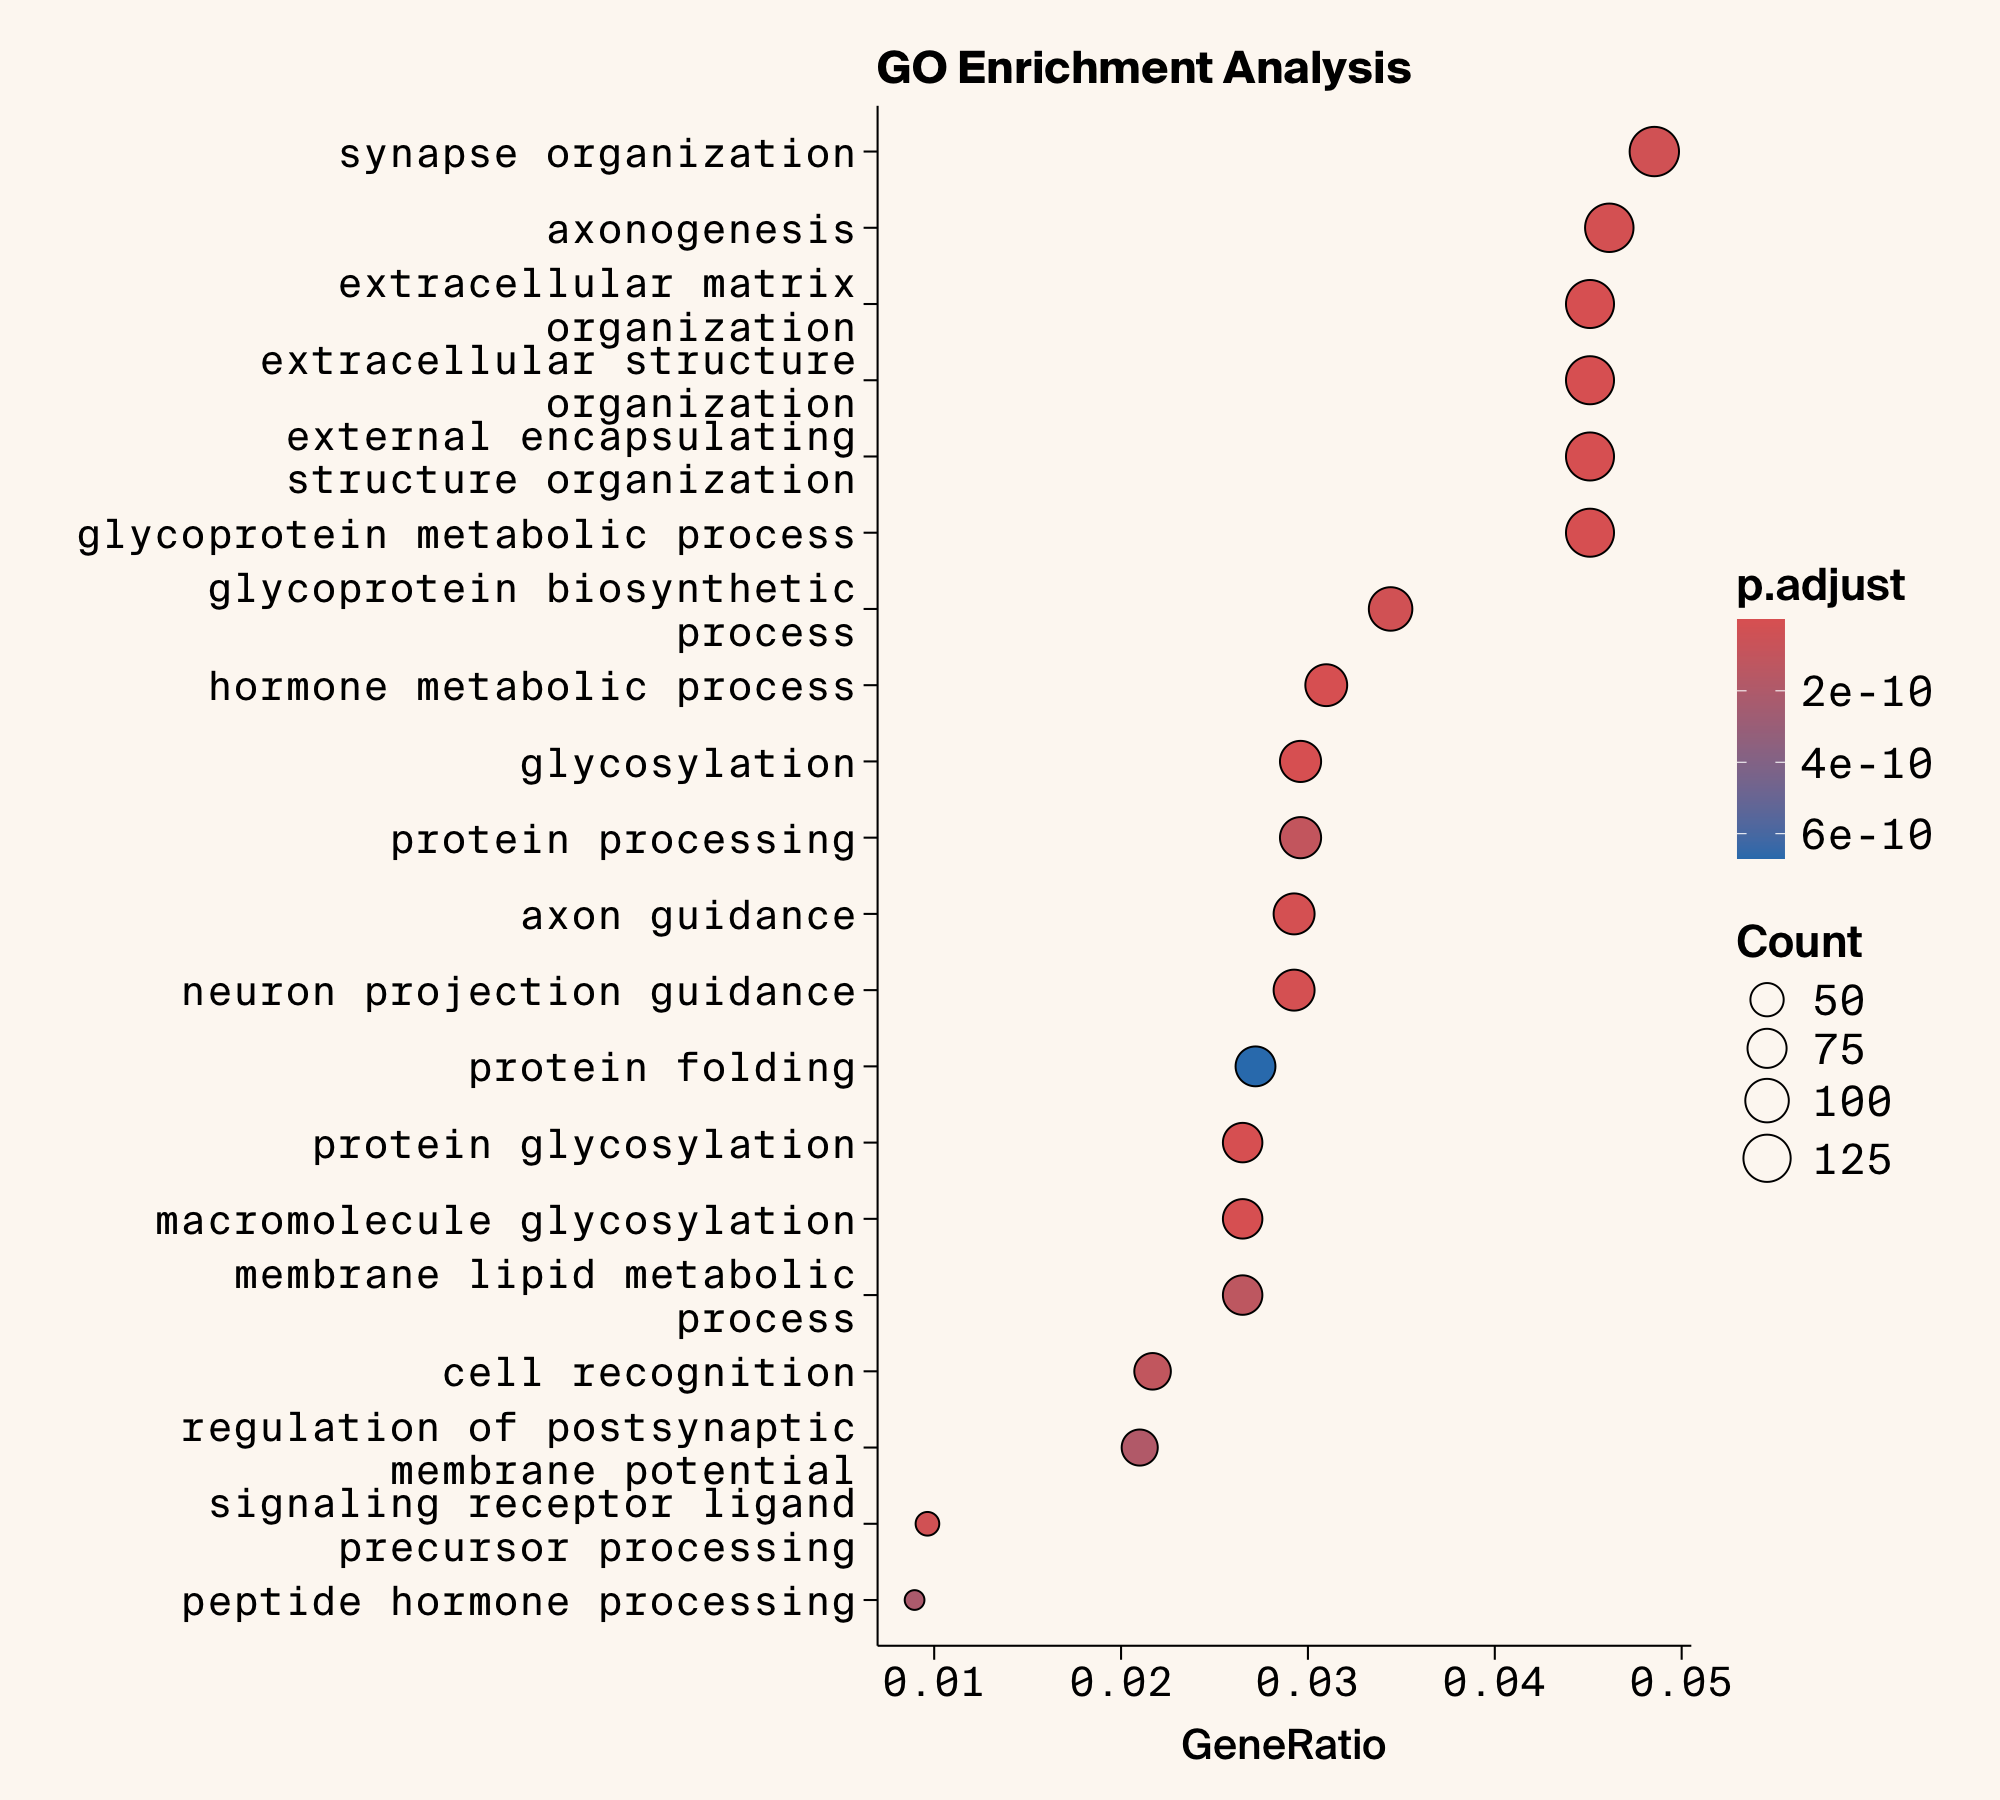

In [139]:
options(repr.plot.width = 10, repr.plot.height = 9, repr.plot.res = 200)

dotplot(ego, showCategory=20, title="GO Enrichment Analysis") +theme_arcadia()

In [140]:
ego@result %>%
  dplyr::filter(p.adjust < 0.05) %>%
  dplyr::select(Description, p.adjust, GeneRatio)

Description                                                                    
GO:0030198 extracellular matrix organization                                              
GO:0043062 extracellular structure organization                                           
GO:0045229 external encapsulating structure organization                                  
GO:0009100 glycoprotein metabolic process                                                 
GO:0070085 glycosylation                                                                  
GO:0042445 hormone metabolic process                                                      
GO:0006486 protein glycosylation                                                          
GO:0043413 macromolecule glycosylation                                                    
GO:0007411 axon guidance                                                                  
GO:0097485 neuron projection guidance                                                     
GO:0007409 axonogenesis                                                                   
GO:0140448 signaling receptor ligand precursor processing                                 
GO:0009101 glycoprotein biosynthetic process                                              
GO:0050808 synapse organization                                                           
GO:0016485 protein processing                                                             
GO:0008037 cell recognition                                                               
GO:0006643 membrane lipid metabolic process                                               
GO:0060078 regulation of postsynaptic membrane potential                                  
GO:0016486 peptide hormone processing                                                     
GO:0006457 protein folding                                                                
GO:0006063 uronic acid metabolic process                                                  
GO:0019585 glucuronate metabolic process                                                  
GO:0006487 protein N-linked glycosylation                                                 
GO:0007416 synapse assembly                                                               
GO:0007215 glutamate receptor signaling pathway                                           
GO:0042391 regulation of membrane potential                                               
GO:0007611 learning or memory                                                             
GO:0030574 collagen catabolic process                                                     
GO:0050890 cognition                                                                      
GO:0034329 cell junction assembly                                                         
⋮          ⋮                                                                              
GO:0016597 amino acid binding                                                             
GO:0016829 lyase activity                                                                 
GO:0008378 galactosyltransferase activity                                                 
GO:0005253 monoatomic anion channel activity                                              
GO:0035250 UDP-galactosyltransferase activity                                             
GO:0043236 laminin binding                                                                
GO:0005237 inhibitory extracellular ligand-gated monoatomic ion channel activity          
GO:0015926 glucosidase activity                                                           
GO:0050660 flavin adenine dinucleotide binding                                            
GO:0016859 cis-trans isomerase activity                                                   
GO:0099094 ligand-gated monoatomic cation channel activity                                
GO:0042562 hormone binding                                                                
GO:0070

In [143]:
ego@result %>% nrow()

[1] 338

### Viruses

In [144]:
gene_symbols <- viruses$human_gene_names_primary
gene2entrez <- AnnotationDbi::select(org.Hs.eg.db, keys = gene_symbols, keytype = "SYMBOL", columns = c("ENTREZID"))
gene2entrez <- na.omit(gene2entrez)
gene_list <- unique(gene2entrez$ENTREZID)
ego <- enrichGO(gene = gene_list, OrgDb = org.Hs.eg.db, keyType = "ENTREZID", ont = "ALL",
                pAdjustMethod= "bonferroni", pvalueCutoff = 0.05, qvalueCutoff = 0.2,
                readable = TRUE)

'select()' returned many:1 mapping between keys and columns



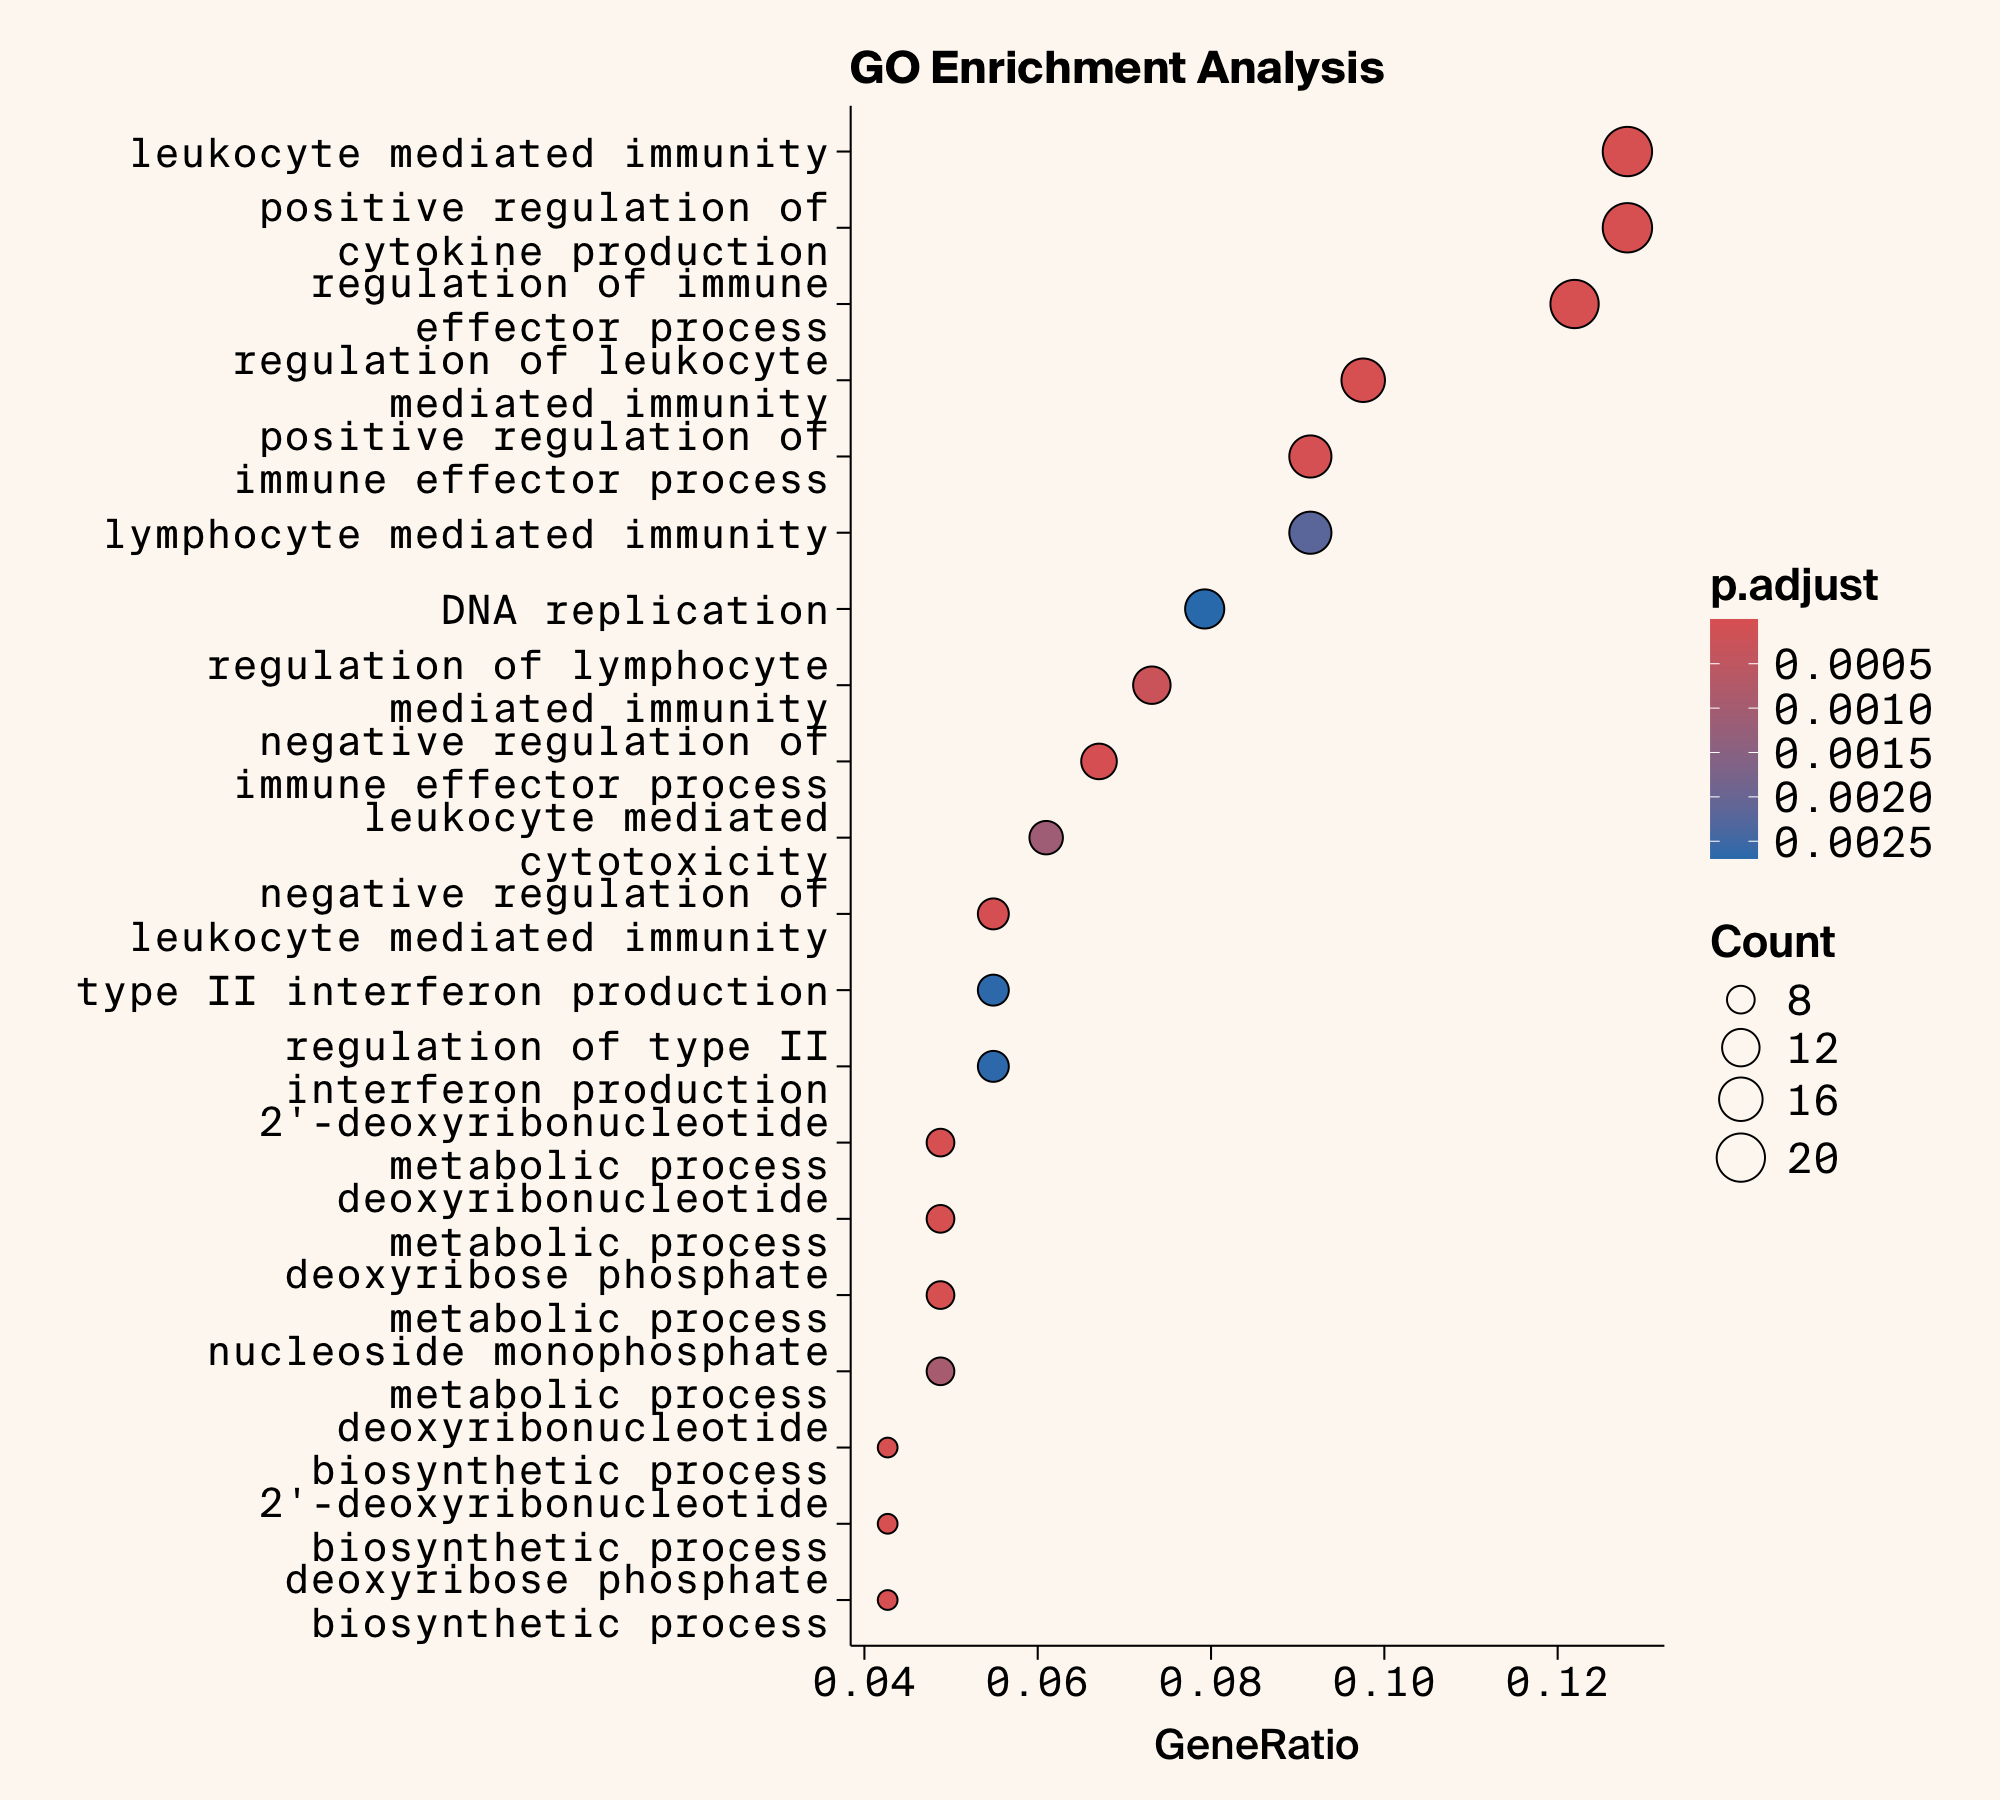

In [145]:
options(repr.plot.width = 10, repr.plot.height = 9, repr.plot.res = 200)
dotplot(ego, showCategory=20, title="GO Enrichment Analysis") +
  theme_arcadia()

In [146]:
ego@result %>% nrow()

[1] 72

In [166]:
ego@result %>%
  dplyr::filter(p.adjust < 0.05) %>%
  dplyr::select(Description, p.adjust, GeneRatio)

Description                                                                                     
GO:0009263 deoxyribonucleotide biosynthetic process                                                        
GO:0009265 2'-deoxyribonucleotide biosynthetic process                                                     
GO:0046385 deoxyribose phosphate biosynthetic process                                                      
GO:0002697 regulation of immune effector process                                                           
GO:0002703 regulation of leukocyte mediated immunity                                                       
GO:0002443 leukocyte mediated immunity                                                                     
GO:0001819 positive regulation of cytokine production                                                      
GO:0009394 2'-deoxyribonucleotide metabolic process                                                        
GO:0009262 deoxyribonucleotide metabolic process                                                           
GO:0019692 deoxyribose phosphate metabolic process                                                         
GO:0002704 negative regulation of leukocyte mediated immunity                                              
GO:0002698 negative regulation of immune effector process                                                  
GO:0002699 positive regulation of immune effector process                                                  
GO:0002706 regulation of lymphocyte mediated immunity                                                      
GO:0009123 nucleoside monophosphate metabolic process                                                      
GO:0001909 leukocyte mediated cytotoxicity                                                                 
GO:0002449 lymphocyte mediated immunity                                                                    
GO:0032609 type II interferon production                                                                   
GO:0032649 regulation of type II interferon production                                                     
GO:0006260 DNA replication                                                                                 
GO:0032102 negative regulation of response to external stimulus                                            
GO:0002367 cytokine production involved in immune response                                                 
GO:0050777 negative regulation of immune response                                                          
GO:0009124 nucleoside monophosphate biosynthetic process                                                   
GO:0001910 regulation of leukocyte mediated cytotoxicity                                                   
GO:0071674 mononuclear cell migration                                                                      
GO:0001912 positive regulation of leukocyte mediated cytotoxicity                                          
GO:0048002 antigen processing and presentation of peptide antigen                                          
GO:0031343 positive regulation of cell killing                                                             
GO:0032640 tumor necrosis factor production                                                                
⋮          ⋮                                                                                               
GO:0045428 regulation of nitric oxide biosynthetic process                                                 
GO:0002476 antigen processing and presentation of endogenous peptide antigen via MHC class Ib              
GO:0002484 antigen processing and presentation of endogenous peptide antigen via MHC class I via ER pathway
GO:0080164 regulation of nitric oxide metabolic process                                                    
GO:0071675 regulation of mononuclear cell migration                                                        
GO:0002474 anti

## Do species of the same genus mimic the same proteins?

### Plasmodium

In [153]:
falciparum <- "Plasmodium falciparum (isolate 3D7)"
malariae <- "Plasmodium malariae"
ovale <- "Plasmodium ovale (malaria parasite P. ovale)"
vivax <- "Plasmodium vivax (strain Salvador I)"
plasmodium_organisms <- c(falciparum, malariae, ovale, vivax)

plasmodium <- eukaryote_matches %>% filter(query_organism %in% plasmodium_organisms)

gene_sets <- lapply(plasmodium_organisms, function(org) {
  unique(plasmodium$human_gene_names_primary[plasmodium$query_organism == org])
})
names(gene_sets) <- plasmodium_organisms

upset_data <- fromList(gene_sets)

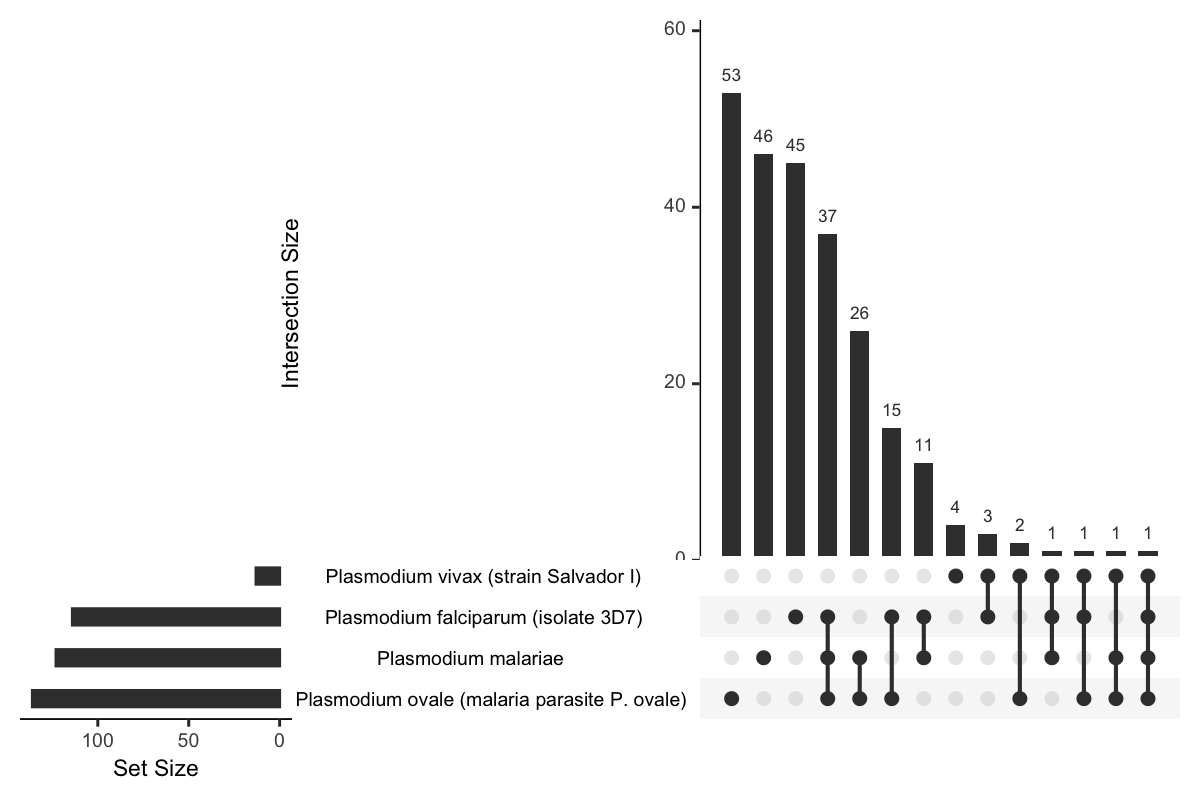

In [160]:
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 200)

upset(upset_data, 
      nsets = length(plasmodium_organisms),  # Number of sets to include
      order.by = "freq") 

In [185]:
plasmodium %>% 
  dplyr::select(query_organism, target, human_gene_names_primary, human_function_cc) %>%
  distinct() %>%
  group_by(target, human_gene_names_primary, human_function_cc) %>% 
  tally() %>%
  arrange(desc(n))

target human_gene_names_primary
1   Q8N335 GPD1L                   
2   O14561 NDUFAB1                 
3   P04843 RPN1                    
4   P07237 P4HB                    
5   P08397 HMBS                    
6   P10809 HSPD1                   
7   P11021 HSPA5                   
8   P13686 ACP5                    
9   P13716 ALAD                    
10  P14091 CTSE                    
11  P14618 PKM                     
12  P20142 PGC                     
13  P30044 PRDX5                   
14  P49257 LMAN1                   
15  P49448 GLUD2                   
16  P53582 METAP1                  
17  P53634 CTSC                    
18  P60174 TPI1                    
19  P61604 HSPE1                   
20  Q13423 NNT                     
21  Q14696 MESD                    
22  Q15363 TMED2                   
23  Q16740 CLPP                    
24  Q5TEA6 SEL1L2                  
25  Q6ZWE6 PLEKHM3                 
26  Q86V85 GPR180                  
27  Q8N0V3 RBFA                    
28  Q96JJ7 TMX3                    
29  Q99757 TXN2                    
30  Q9BVK6 TMED9                   
⋮   ⋮      ⋮                       
217 Q9GZM7 TINAGL1                 
218 Q9H0D6 XRN2                    
219 Q9H0I9 TKTL2                   
220 Q9H0R6 QRSL1                   
221 Q9H0U6 MRPL18                  
222 Q9H0V9 LMAN2L                  
223 Q9H2K0 MTIF3                   
224 Q9H4K7 MTG2                    
225 Q9HAR2 ADGRL3                  
226 Q9HBG4 ATP6V0A4                
227 Q9HBH1 PDF                     
228 Q9HC38 GLOD4                   
229 Q9NP78 ABCB9                   
230 Q9NPB8 GPCPD1                  
231 Q9NQQ7 SLC35C2                 
232 Q9NQW7 XPNPEP1                 
233 Q9NR61 DLL4                    
234 Q9NUT2 ABCB8                   
235 Q9NWU5 MRPL22                  
236 Q9NYL4 FKBP11                  
237 Q9UBP4 DKK3                    
238 Q9UBS9 SUCO                    
239 Q9UNP9 PPIE                    
240 Q9UNQ2 DIMT1                   
241 Q9Y2B2 PIGL                    
242 Q9Y2Z4 YARS2                   
243 Q9Y5P4 CERT1                   
244 Q9Y680 FKBP7                   
245 Q9Y697 NFS1                    
246 Q9Y6V0 PCLO                    
    human_function_cc                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [186]:
plasmodium %>% filter(human_gene_names_primary == "GPD1L")

query_organism                               query      target qlen tlen
1 Plasmodium malariae                          A0A1C3KCI4 Q8N335 395  351 
2 Plasmodium ovale (malaria parasite P. ovale) A0A1D3THP8 Q8N335 395  351 
3 Plasmodium vivax (strain Salvador I)         A5K4G2     Q8N335 394  351 
4 Plasmodium falciparum (isolate 3D7)          Q8IIL4     Q8N335 394  351 
  alnlen alntmscore qtmscore ttmscore avg_tmscore ⋯
1 344    0.9653     0.8423   0.9463   0.9179667   ⋯
2 344    0.9409     0.8230   0.9227   0.8955333   ⋯
3 347    0.9429     0.8337   0.9325   0.9030333   ⋯
4 348    0.9680     0.8562   0.9598   0.9280000   ⋯
  query_protein_families                                  query_region
1 NAD-dependent glycerol-3-phosphate dehydrogenase family NA          
2 NAD-dependent glycerol-3-phosphate dehydrogenase family NA          
3 NAD-dependent glycerol-3-phosphate dehydrogenase family NA          
4 NAD-dependent glycerol-3-phosphate dehydrogenase family NA          
  query_repeat query_zinc_finger query_pub_med_id
1 NA           NA                NA              
2 NA           NA                NA              
3 NA           NA                18843361        
4 NA           NA                12368864        
  query_lineage                                                                                                                                                              
1 ['cellular organisms', 'Eukaryota', 'Sar', 'Alveolata', 'Apicomplexa', 'Aconoidasida', 'Haemosporida', 'Plasmodiidae', 'Plasmodium', 'Plasmodium']                         
2 ['cellular organisms', 'Eukaryota', 'Sar', 'Alveolata', 'Apicomplexa', 'Aconoidasida', 'Haemosporida', 'Plasmodiidae', 'Plasmodium', 'Plasmodium']                         
3 ['cellular organisms', 'Eukaryota', 'Sar', 'Alveolata', 'Apicomplexa', 'Aconoidasida', 'Haemosporida', 'Plasmodiidae', 'Plasmodium', 'Plasmodium', 'Plasmodium vivax']     
4 ['cellular organisms', 'Eukaryota', 'Sar', 'Alveolata', 'Apicomplexa', 'Aconoidasida', 'Haemosporida', 'Plasmodiidae', 'Plasmodium', 'Plasmodium', 'Plasmodium falciparum']
  query_gene_ontology_biological_process
1 NA                                    
2 NA                                    
3 NA                                    
4 NA                                    
  query_gene_ontology_cellular_component                       
1 NA                                                           
2 NA                                                           
3 glycerol-3-phosphate dehydrogenase (FAD) complex [GO:0009331]
4 NA                                                           
  query_gene_ontology_go                                                                                                                                                                                                                                                                                                                 
1 NA                                                                                                                                                                                                                                                                                                                                     
2 NA                                                                                                                                                                                                                                                                                                                                     
3 glycerol-3-phosphate dehydrogenase (FAD) complex [GO:0009331]; glycerol-3-phosphate dehydrogenase (NAD+) activity [GO:0141152]; NAD binding [GO:0051287]; protein homodimerization activity [GO:0042803]; carbohydrate metabolic process [GO:0005975]; glycerol-3-phosphate catabolic process [GO:0046168]; NADH oxidation [GO:0006116]
4 NA                                           

## Leishmania

In [162]:
infantum <- "Leishmania infantum"
major <- "Leishmania major"
braziliensis <- "Leishmania braziliensis"
leishmania_organisms <- c(infantum, major, braziliensis)

leishmania <- eukaryote_matches %>% filter(query_organism %in% leishmania_organisms)

gene_sets <- lapply(leishmania_organisms, function(org) {
  unique(leishmania$human_gene_names_primary[leishmania$query_organism == org])
})
names(gene_sets) <- leishmania_organisms

upset_data <- fromList(gene_sets)

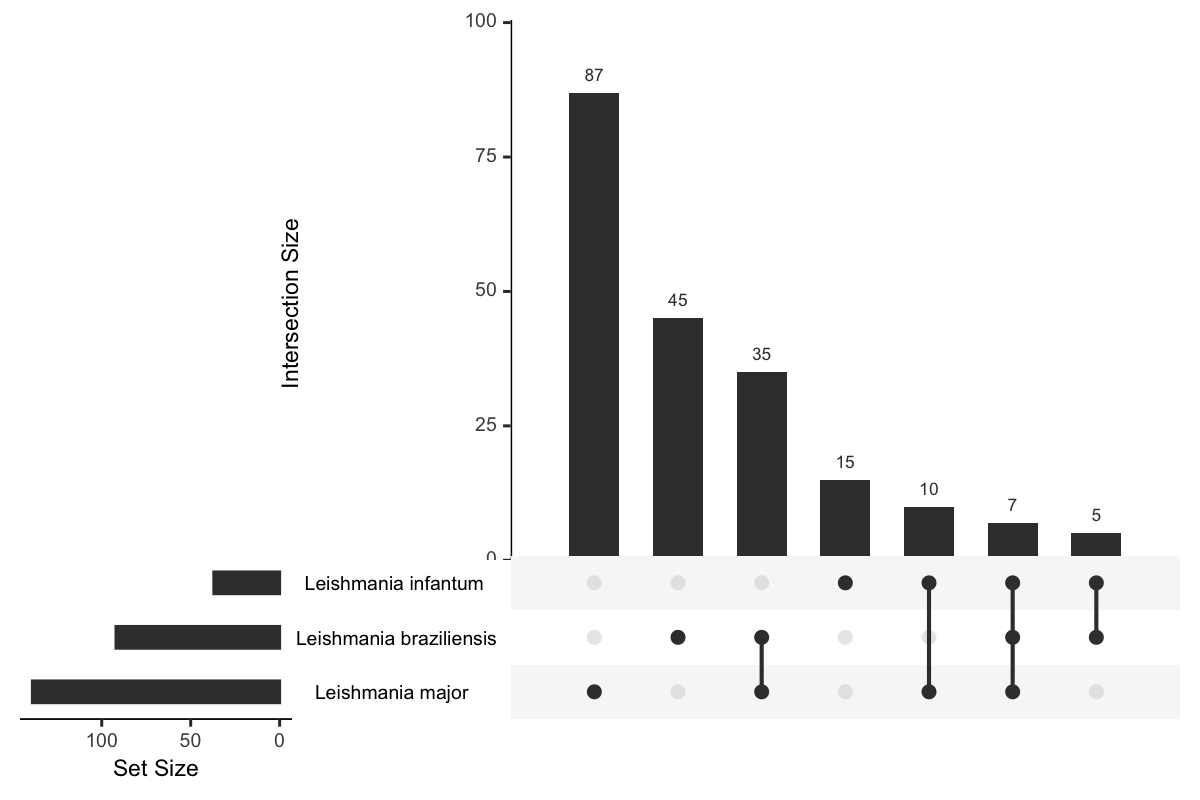

In [163]:
upset(upset_data, 
      nsets = length(leishmania_organisms),
      order.by = "freq") 

In [187]:
leishmania %>% 
  dplyr::select(query_organism, target, human_gene_names_primary, human_function_cc) %>%
  distinct() %>%
  group_by(target, human_gene_names_primary, human_function_cc) %>% 
  tally() %>%
  arrange(desc(n))

target human_gene_names_primary
1   P27449 ATP6V0C                 
2   P27797 CALR                    
3   P49755 TMED10                  
4   Q96HS1 PGAM5                   
5   Q9BZG2 ACP4                    
6   Q9HD45 TM9SF3                  
7   Q9NQW1 SEC31B                  
8   O00391 QSOX1                   
9   O60884 DNAJA2                  
10  O75864 PPP1R37                 
11  O76031 CLPX                    
12  P05386 RPLP1                   
13  P07237 P4HB                    
14  P10515 DLAT                    
15  P10619 CTSA                    
16  P11021 HSPA5                   
17  P13667 PDIA4                   
18  P14625 HSP90B1                 
19  P15309 ACP3                    
20  P43307 SSR1                    
21  P43308 SSR2                    
22  P45877 PPIC                    
23  P46459 NSF                     
24  Q13438 OS9                     
25  Q14694 USP10                   
26  Q14697 GANAB                   
27  Q14CZ7 FASTKD3                 
28  Q15363 TMED2                   
29  Q16654 PDK4                    
30  Q2TAA5 ALG11                   
⋮   ⋮      ⋮                       
175 Q96TA2 YME1L1                  
176 Q9BQE3 TUBA1C                  
177 Q9GZT9 EGLN1                   
178 Q9H078 CLPB                    
179 Q9H0V9 LMAN2L                  
180 Q9H3G5 CPVL                    
181 Q9H3J6 MTRFR                   
182 Q9H3N1 TMX1                    
183 Q9H3Z7 ABHD16B                 
184 Q9H9A6 LRRC40                  
185 Q9HAT1 LMAN1L                  
186 Q9NYL4 FKBP11                  
187 Q9NYZ2 SLC25A37                
188 Q9NZC3 GDE1                    
189 Q9P1Z3 HCN3                    
190 Q9P2W1 PSMC3IP                 
191 Q9UGC7 MTRF1L                  
192 Q9UMS0 NFU1                    
193 Q9UNQ0 ABCG2                   
194 Q9UQ10 DHDH                    
195 Q9UQ13 SHOC2                   
196 Q9UQ88 CDK11A                  
197 Q9Y2B2 PIGL                    
198 Q9Y2L9 LRCH1                   
199 Q9Y2Y1 POLR3K                  
200 Q9Y2Z9 COQ6                    
201 Q9Y3B4 SF3B6                   
202 Q9Y3D0 CIAO2B                  
203 Q9Y4D2 DAGLA                   
204 Q9Y697 NFS1                    
    human_function_cc                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

## Schistosoma

In [164]:
haematobium <- "Schistosoma haematobium (Blood fluke)"
mansoni <- "Schistosoma mansoni (Blood fluke)"
schistosoma_organisms <- c(haematobium, mansoni)

schistosoma <- eukaryote_matches %>% filter(query_organism %in% schistosoma_organisms)

gene_sets <- lapply(schistosoma_organisms, function(org) {
  unique(schistosoma$human_gene_names_primary[schistosoma$query_organism == org])
})
names(gene_sets) <- schistosoma_organisms

upset_data <- fromList(gene_sets)

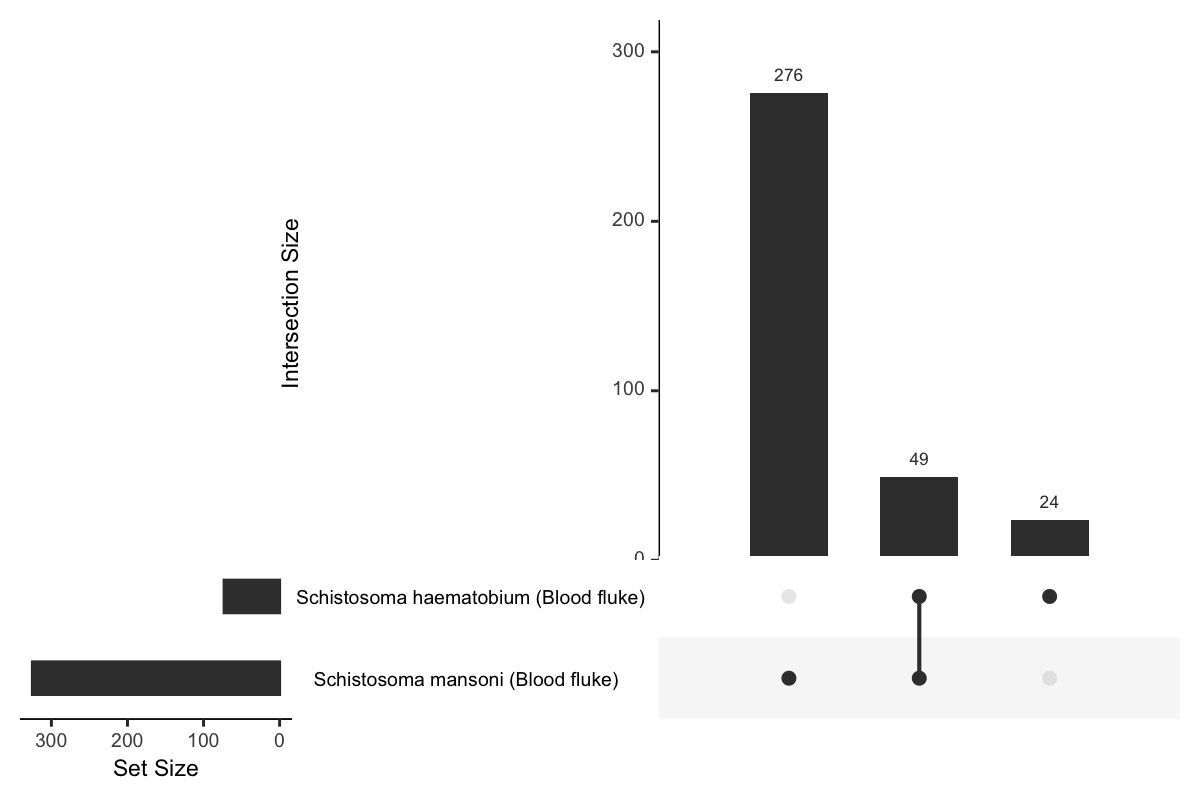

In [165]:
upset(upset_data, 
      nsets = length(leishmania_organisms),
      order.by = "freq") 

## how many matches does each species have?

In [171]:
num_eukaryote_matches <- eukaryotes %>%
  group_by(query_organism) %>%
  tally() %>%
  dplyr::select(query_organism, num_matches = n)

write_tsv(num_eukaryote_matches, "num_eukaryote_matches.tsv")

## Which human targets have the most hits?

In [178]:
num_human_hits <- eukaryote_matches %>% 
  group_by(target, human_gene_names_primary, human_function_cc) %>%
  tally() %>% 
  arrange(desc(n))

table(num_human_hits$n > 1)

write_tsv(num_human_hits, "tmp_num_human_hits.tsv")


FALSE  TRUE 
 1700  1391 

In [179]:
num_human_hits <- viruses %>% 
  group_by(target, human_gene_names_primary, human_function_cc) %>%
  tally() %>% 
  arrange(desc(n))

table(num_human_hits$n > 1)

write_tsv(num_human_hits, "tmp_num_human_hits_viruses.tsv")


FALSE  TRUE 
   85    93 

In [142]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Big Sur ... 10.16

Matrix products: default
BLAS/LAPACK: /Users/taylorreiter/miniconda3/envs/tidyjupyter/lib/libopenblasp-r0.3.26.dylib;  LAPACK version 3.12.0

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

time zone: America/New_York
tzcode source: internal

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] DOSE_3.28.1            enrichplot_1.22.0      org.Hs.eg.db_3.18.0   
 [4] AnnotationDbi_1.64.1   IRanges_2.36.0         S4Vectors_0.40.2      
 [7] Biobase_2.62.0         BiocGenerics_0.48.1    clusterProfiler_4.10.0
[10] UpSetR_1.4.0           arcadiathemeR_0.1.0    lubridate_1.9.3       
[13] forcats_1.0.0          stringr_1.5.1          dplyr_1.1.4           
[16] purrr_1.0.2            readr_2.1.5            tidyr_1.3.1           
[19] tibble_3.2.1           ggplot